In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv")
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. size of the data

In [6]:
df.size

9801

In [7]:
df.shape

(891, 11)

In [10]:
df.memory_usage(deep=True)

Index         132
survived     7128
pclass       7128
name        74813
sex         54979
age          7128
sibsp        7128
parch        7128
ticket      56802
fare         7128
cabin       34344
embarked    51626
dtype: int64

# 2. How does the data look

In [11]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
df.sample(5) # % random samples

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
199,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
334,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
499,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
575,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
620,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C


# 3. Datatype of columns

In [20]:
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 4. How does the data look mathematically

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# 5. Check missing values

In [27]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

# 6. Check duplicate values

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [30]:
df.duplicated().sum()

0

In [31]:
df[df.duplicated() == True]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


# 7. Check unique values

In [32]:
df.nunique()

survived      2
pclass        3
name        891
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64

In [34]:
corr_mat = df.corr()
corr_mat

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_5548/2851270020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

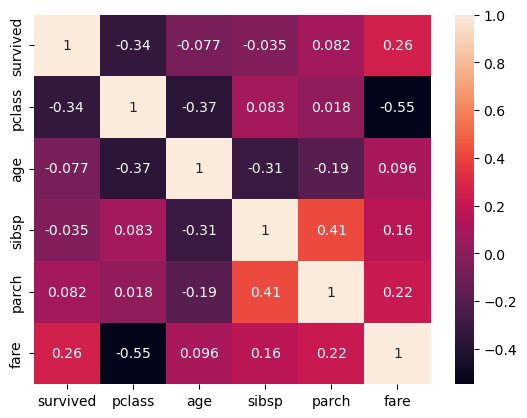

In [36]:
import seaborn as sns
sns.heatmap(corr_mat,annot=True)

Types of analyses :
   1. Univariate Analysis
   2. Bivariate Analysis
   3. Multivariate Analysis


# Univariate Analysis

In [37]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [43]:
df['ticket'].dtypes

dtype('O')

We check different things with respect to a single column

Types of variables :
   1. Categorical
   2. Numeric

In [51]:
categorical_features=[column for column in df.columns if df[column].dtype == 'O']
categorical_features

['name', 'sex', 'ticket', 'cabin', 'embarked']

In [48]:
numerical_features = [column for column in df.columns if df[column].dtype != 'O']
numerical_features

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [52]:
df[categorical_features]

,name,sex,ticket,cabin,embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [50]:
df[numerical_features]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


# Univariate Analysis on Categorical Features

## 1. Countplot

<Axes: xlabel='embarked', ylabel='count'>

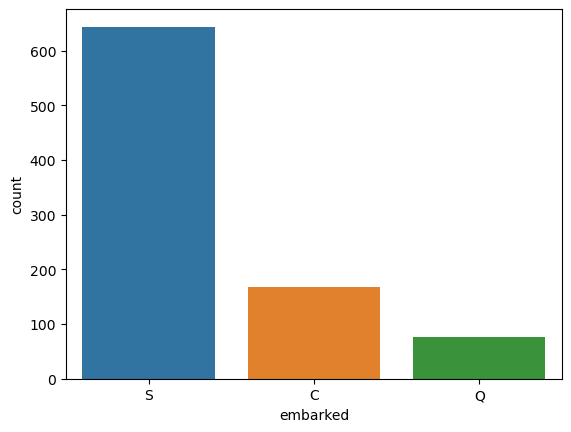

In [57]:
sns.countplot(data=df,x='embarked')

1. Most of the people boarded Titanic from location 'S'.
2. Least of the people boarded Titanic from location 'Q'.

<Axes: xlabel='sex', ylabel='count'>

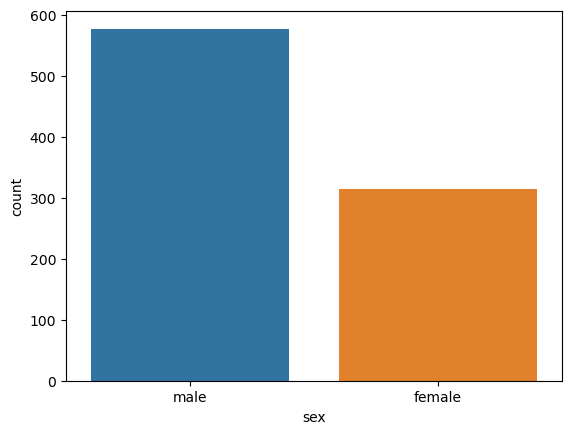

In [58]:
sns.countplot(df,x='sex')

1. there are more males than females.

<Axes: xlabel='pclass', ylabel='count'>

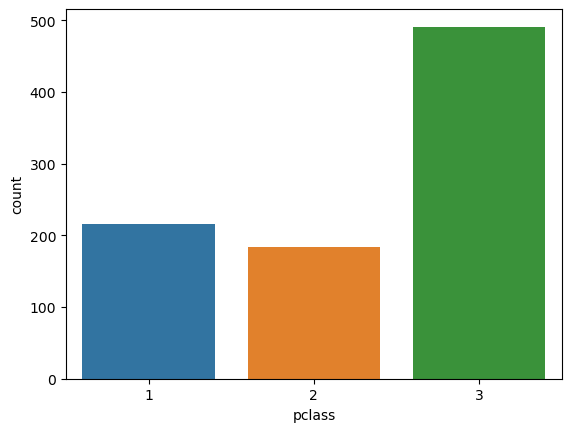

In [59]:
sns.countplot(df,x='pclass')

1. Most of the people were in class 3.
2. Least of the people were in class 2.

In [60]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<Axes: >

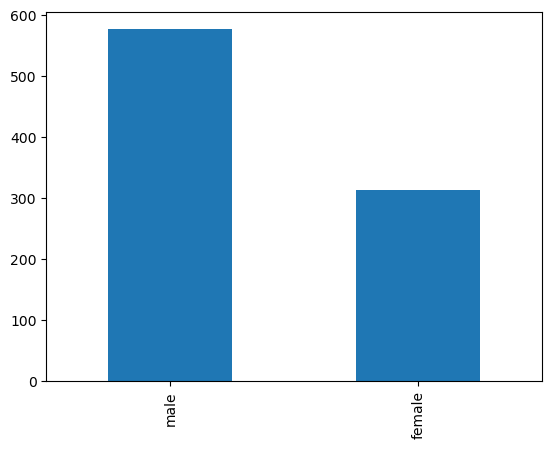

In [64]:
df['sex'].value_counts().plot(kind='bar')

In [61]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [62]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

## 2. Piechart

<Axes: ylabel='sex'>

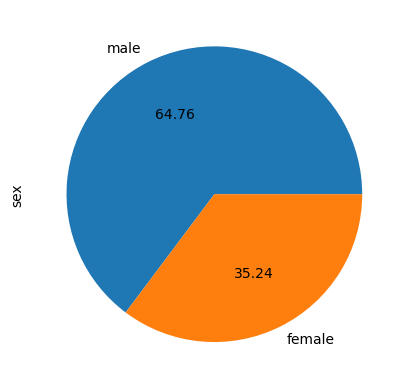

In [66]:
df['sex'].value_counts().plot(kind='pie',autopct = '%.2f')

<Axes: ylabel='pclass'>

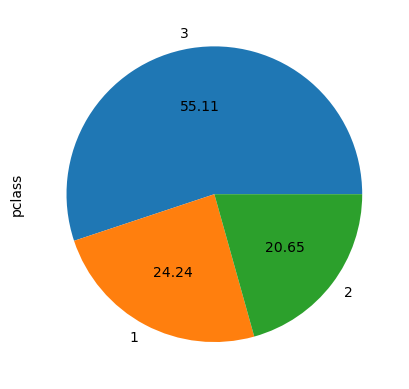

In [67]:
df['pclass'].value_counts().plot(kind='pie',autopct = '%.2f')

# Univariate Analysis on Numerical Features

## 1. Histogram

In [68]:
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

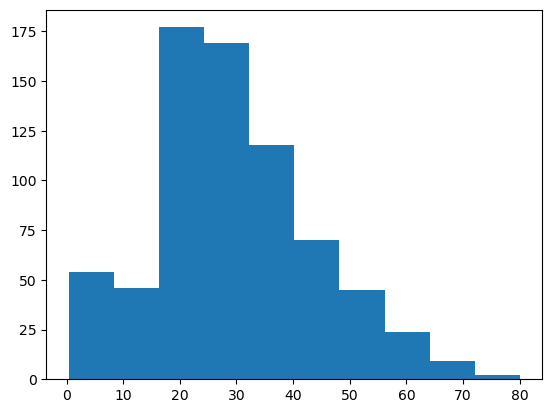

In [69]:
plt.hist(df['age'])